<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png" style="width:1000px;height:120px;">


#### Dataset 1 [80:20] split for Training and Testing Results

                                                                                    Full Name: Haris Amin
                                                                                    UWE ID: 21066558

## Phishng URL detection using Machine Learning Techniques

### Import Libraries as required

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)
import nltk
import sklearn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

from collections import Counter
from timeit import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


### Load the dataset

In [2]:
# Load in the data set as required

def load_csv_data():
    data = pd.read_csv('/home/uwe/Desktop/dataset_small.csv')
    return data

data = load_csv_data()
data

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1,0,0,5,0,1,0,0,0,0,...,1,2,2,563,0,0,0,0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1,4,0,122,1,0,0,0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1,2,1,1122,0,0,0,0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5,2,5,299,1,1,0,0,0,0


### To move further we are use Python programming language, pandas library and Sciket learn library to understand the data and investigate further

### Check the type of the data

In [3]:
type(data)

pandas.core.frame.DataFrame

### To Check what values in the phishing colums.

In [4]:
pd.Series(data['phishing'])

0        0
1        0
2        0
3        1
4        1
        ..
58640    1
58641    0
58642    1
58643    0
58644    0
Name: phishing, Length: 58645, dtype: int64

### To check what values in the qty_nameservers colums.

In [5]:
pd.Series(data['qty_nameservers'])

0        4
1        4
2        2
3        2
4        2
        ..
58640    2
58641    4
58642    2
58643    2
58644    2
Name: qty_nameservers, Length: 58645, dtype: int64

### Show data in boolen format

In [6]:
# This shows all the data in boolen ture or false format
data > 0

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,True,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,True
4,True,True,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,True,False,False,True,False,True,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
58641,True,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,False
58642,True,True,True,True,False,True,True,True,False,False,...,True,True,True,True,False,False,False,False,False,True
58643,True,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


### Check the data

In [7]:
data

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1,0,0,5,0,1,0,0,0,0,...,1,2,2,563,0,0,0,0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1,4,0,122,1,0,0,0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1,2,1,1122,0,0,0,0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5,2,5,299,1,1,0,0,0,0


### Graph shows how many phishing[1] and legitimate[0] url in the phishing column

<AxesSubplot:>

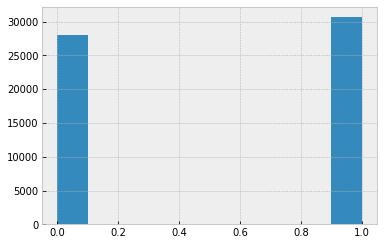

In [8]:
import matplotlib.pyplot as mtplot
mtplot.style.use('bmh')
data['phishing'].hist()

<AxesSubplot:xlabel='phishing'>

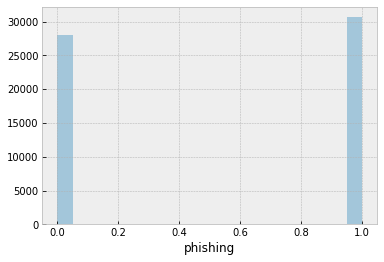

In [9]:
# histogram ye bata raha hai ky density or frequency kya hai phishing feature ki and also ye bata raha hai ky ye 0 and 1 per phishing aye hai.
import seaborn as sns
%matplotlib inline
# kde = false use krty han ky curve line na dekhay agar ham issay hata dy gy tou curve dekhay ga. ye khelata hai kernel density function
sns.distplot(data['phishing'], kde = False , bins = 20)

### To check the Null Values

In [10]:
data.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

### To check the datatype

In [11]:
data.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

### To check how many columns in the dataset

In [12]:
data.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

### To get more info about the data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


### Shapes of the data: shows how many Columns and rows

In [14]:
data.shape

(58645, 112)

### Check the uniqueness of the features

In [15]:
data.nunique()

qty_dot_url             23
qty_hyphen_url          30
qty_underline_url       22
qty_slash_url           25
qty_questionmark_url     6
                        ..
qty_redirects           15
url_google_index         3
domain_google_index      3
url_shortened            2
phishing                 2
Length: 112, dtype: int64

### describe() provides description  of the data by providing means, min, max , count value, etc

In [16]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


### Provides how many features used in this dataset

In [17]:
features = list(data._get_numeric_data().columns)
features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

In [18]:
X = data.iloc[:,: -1].values
X.shape

(58645, 111)

In [19]:
type(X)

numpy.ndarray

In [20]:
y = data.iloc[:, -1].values
y.shape

(58645,)

In [21]:
display(data.agg(['count','std',"max",'mean',"min"]).style.background_gradient(axis = 0, cmap="Spectral"))

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,0.096013,0.093381,0.136331,0.370849,0.075802,0.122604,2.115804,0.305755,54.712657,0.790989,0.465673,0.019802,0.000000,0.000000,0.000000,0.004129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.714293,7.244541,0.058444,0.059307,0.932358,1.231963,0.702284,2.269983,0.457615,0.483261,0.539680,0.517823,0.465111,0.465625,0.470538,0.461188,0.471482,0.580336,0.457615,0.472520,1.826009,28.066352,0.762056,0.870709,0.606537,0.457615,0.457615,0.463333,0.458425,0.461529,0.460601,0.461782,0.458945,0.

In [22]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed and evades the case of overfitting while model training.
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,2,2,14399,1,1,0,0,0,0
1,4,1,0,4,0,1,1,0,0,0,...,1,2,1,3594,0,1,0,0,0,1
2,4,17,10,3,0,5,0,4,0,0,...,5,2,0,283,1,0,0,0,0,1
3,3,1,0,6,0,0,0,0,0,0,...,1,2,1,517,0,0,0,0,0,1
4,1,0,0,2,0,1,0,0,1,0,...,1,2,0,691,1,1,0,0,0,1


In [23]:
type(y)

numpy.ndarray

# Training and Testing

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 12)   
#random_state = 1

In [25]:
print(X_train.shape)

(46916, 111)


In [26]:
print(X_test.shape)

(11729, 111)


# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
%%time
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train.view()

CPU times: user 230 ms, sys: 262 ms, total: 492 ms
Wall time: 523 ms


array([[ 0.49413254, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [-0.1917874 ,  1.14642959, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [ 0.49413254, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       ...,
       [-0.87770735, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [ 0.49413254, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [ 0.49413254, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366]])

In [29]:
X_test = sc.transform(X_test)
X_test.view()

array([[ 0.49413254, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [-0.1917874 , -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [ 0.49413254, -0.34150586,  1.02623604, ..., -0.03411704,
        -0.04714282, -0.08988366],
       ...,
       [ 2.55189238,  1.14642959, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [-0.87770735, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366],
       [-0.87770735, -0.34150586, -0.21328949, ..., -0.03411704,
        -0.04714282, -0.08988366]])

# Random Forest Classifier

In [30]:
%%time
clf = RandomForestClassifier(max_depth=100, random_state= 42 )
clf.fit(X_train, y_train)

CPU times: user 16.7 s, sys: 71.6 ms, total: 16.8 s
Wall time: 16.9 s


RandomForestClassifier(max_depth=100, random_state=42)

In [31]:
rand_pred = clf.predict(X_test)
rand_pred

array([1, 0, 1, ..., 1, 1, 0])

In [32]:
accuracy_score(y_test, rand_pred)

0.9559212209054481

### Performance Evaluation Metrix of Random Forest

In [33]:
cm1 = confusion_matrix(y_test, rand_pred)
print(cm1)
print(classification_report(y_test, rand_pred))

[[5357  301]
 [ 216 5855]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5658
           1       0.95      0.96      0.96      6071

    accuracy                           0.96     11729
   macro avg       0.96      0.96      0.96     11729
weighted avg       0.96      0.96      0.96     11729



### Confusion Metrix


CONFUSION MATRIX


<AxesSubplot:>

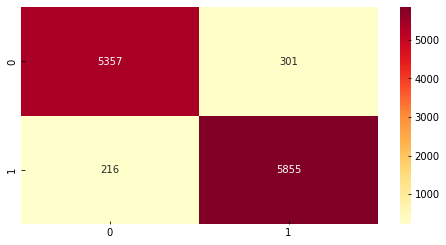

In [34]:
import matplotlib.pyplot as plt
print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap( cm1 , annot = True,fmt='d',cmap="YlOrRd")

### Graph of Random Forest

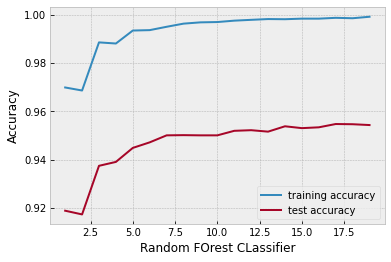

In [35]:
import matplotlib.pyplot as plt
#cc
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Random FOrest CLassifier")
plt.legend();

### Random Forest Hyperparameter tuning using Grid Search CV

In [36]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [37]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [38]:
rf = RandomForestClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [40]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.8s
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.5min
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/mo

[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20 .
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20, total=   2.2s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60 .
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60, total=   3.8s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, total=   6.7s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, total=   6.2s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, total=   8.4s
[CV] max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60 
[CV]  max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60, total=   4.9s
[CV] max_depth=2, max_features=0.2, max_samples=0.75, n_esti

[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20 .
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20, total=   2.3s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60 .
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60, total=   3.8s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, total=   6.8s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, total=   7.4s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, total=   8.0s
[CV] max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60 
[CV]  max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60, total=   4.5s
[CV] max_depth=2, max_features=0.2, max_samples=0.75, n_esti

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20 .
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20, total=   2.0s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20 .
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20, total=   1.3s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60 .
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60, total=   3.6s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, total=   6.8s
[CV] max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120 
[CV]  max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, total=   7.4s
[CV] max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20 
[CV]  max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20, total=   1.5s
[CV] max_depth=2, max_features=0.2, max_samples=0.75, n_estim

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 27.7min


[CV] max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=100 
[CV]  max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=100, total=  18.7s
[CV] max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120 
[CV]  max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120, total=  22.1s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=20 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=20, total=   6.5s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=20 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=20, total=   4.4s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=60 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=60, total=  17.9s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=60 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=60, total=  14.1s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_es

[CV] max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120 
[CV]  max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120, total=  22.8s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=60 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=60, total=  18.7s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=100 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=100, total=  26.0s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=120 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=120, total=  26.3s
[CV] max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=120 
[CV]  max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=120, total=  26.6s
[CV] max_depth=8, max_features=0.6, max_samples=0.5, n_estimators=60 .
[CV]  max_depth=8, max_features=0.6, max_samples=0.5, n_estimators=60, total=  28.6s
[CV] max_depth=8, max_features=0.6, max_samples=0.5, 

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[CV] max_depth=8, max_features=0.6, max_samples=0.75, n_estimators=120 
[CV]  max_depth=8, max_features=0.6, max_samples=0.75, n_estimators=120, total= 1.2min
[CV] max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=20 .
[CV]  max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=20, total=  14.3s
[CV] max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=20 .
[CV]  max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=20, total=  14.9s
[CV] max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=60 .
[CV]  max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=60, total=  44.2s
[CV] max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=100 
[CV]  max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=100, total= 1.3min
[CV] max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=100 
[CV]  max_depth=8, max_features=1.0, max_samples=0.5, n_estimators=100, total= 1.2min
[CV] max_depth=8, max_features=1.0, max_samples=0.5, n_esti

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 72.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [41]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 120}

In [42]:
rf_grid.best_score_

0.9552604727001246

### Random Forest Hyperparameter tuning using Random Search CV

In [43]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [44]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [45]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [46]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=60 
[CV]  max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=60, total=  16.4s
[CV] max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=100 
[CV]  max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=100, total=  33.3s
[CV] max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=100 
[CV]  max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=100, total=  49.7s
[CV] max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=120 
[CV]  max_depth=None, max_features=0.2, max_samples=0.5, n_estimators=120, total=  44.6s
[CV] max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=20 
[CV]  max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=20, total=   9.0s
[CV] max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=60 
[CV]  max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=60, total=  35.3s
[CV] max_depth=None, max

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[CV]  max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=20, total=   0.1s
[CV] max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=20 
[CV]  max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=20, total=   0.2s
[CV] max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=20 
[CV]  max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=20, total=   0.1s
[CV] max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=20 
[CV]  max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=20, total=   0.1s
[CV] max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=60 
[CV]  max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=60, total=   0.1s
[CV] max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=60 
[CV]  max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=60, total=   0.1s
[CV] max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=60 
[CV]  max_depth=None, max_features

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [47]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.75,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [48]:
rf_grid.best_score_

0.9544931456728396

# Logistic Regression

In [49]:
%%time
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

CPU times: user 14.2 s, sys: 7.41 s, total: 21.7 s
Wall time: 6.54 s


LogisticRegression(random_state=42)

In [50]:
#print("Accuracy is",clf.score(X_test, y_test))

log_pred = clf.predict(X_test)
log_pred
accuracy_score(y_test, log_pred)

0.9012703555290306

### Performance Evaluation Metrix of Logistic Regression

In [51]:
cm2 = confusion_matrix(y_test, log_pred)
print(cm2)
print(classification_report(y_test, log_pred))

[[4991  667]
 [ 491 5580]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      5658
           1       0.89      0.92      0.91      6071

    accuracy                           0.90     11729
   macro avg       0.90      0.90      0.90     11729
weighted avg       0.90      0.90      0.90     11729




CONFUSION MATRIX


<AxesSubplot:>

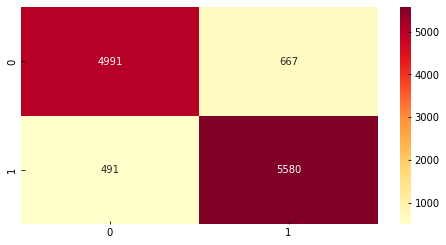

In [52]:
import matplotlib.pyplot as plt
print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap( cm2 , annot = True,fmt='d',cmap="YlOrRd")

# ANN

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=4)
from sklearn.model_selection import cross_val_score

2022-10-19 21:32:53.673546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 21:32:53.673641: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [58]:
def build_classifier():
    classifier = Sequential()

    classifier.add(Dense(
        units = 6,
        kernel_initializer="uniform",
        activation="relu",
        input_dim = 111
        ))
    classifier.add(Dense(
        units = 6,
        kernel_initializer="uniform",
        activation="relu"
        ))

    classifier.add(Dense(
        units = 1,
        kernel_initializer="uniform",
        activation="sigmoid"
        ))

    classifier.compile(
        optimizer = "adam",
        loss="binary_crossentropy",
        metrics=['accuracy']
        )

    return classifier


In [59]:
%%time
from sklearn.model_selection import cross_val_score
classifier = KerasClassifier(build_fn = build_classifier,batch_size = 10, nb_epoch = 50 )

accuracies = cross_val_score(
        estimator=classifier,
        X = X_train,
        y = y_train,
         cv=10       
        )

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[CV]  max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20, total=  29.9s
[CV] max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20 
[CV]  max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20, total=  37.2s
[CV] max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20 
[CV]  max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20, total=  28.7s
[CV] max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60 
[CV]  max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60, total= 1.9min
[CV] max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60 
[CV]  max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60, total= 1.8min
[CV] max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=100 
[CV]  max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=100, total= 1.9min
[CV] max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=120 
[CV]  max_depth=None, max_featu

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_samples=0.5, max_features=1.0, max_depth=2, bootstrap=False, total= 1.3min
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=1, max_samples=0.75, max_features=0.2, max_depth=None, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=1, max_samples=0.75, max_features=0.2, max_depth=None, bootstrap=True, total=  24.9s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_samples=1.0, max_features=0.6, max_depth=None, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_samples=1.0, max_features=0.6, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_samples=1.0, max_features=0.6, max_depth=None, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=1, max_samples=1.0, max_features=0.6, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=120, mi

2022-10-19 21:33:56.973307: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18747456 exceeds 10% of free system memory.


470/470 [==============================] - 4s 8ms/step - loss: 0.2613 - accuracy: 0.8905


2022-10-19 21:34:44.211493: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18747456 exceeds 10% of free system memory.


470/470 [==============================] - 4s 7ms/step - loss: 0.2474 - accuracy: 0.9017


2022-10-19 21:35:37.628808: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18747456 exceeds 10% of free system memory.


334/470 [====================>.........] - ETA: 0s - loss: 0.2507 - accuracy: 0.8973[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_samples=0.5, max_features=1.0, max_depth=None, bootstrap=False, total= 5.7min
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_samples=0.5, max_features=1.0, max_depth=None, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_samples=0.5, max_features=1.0, max_depth=None, bootstrap=False, total= 3.6min
352/470 [=====================>........] - ETA: 0s - loss: 0.2491 - accuracy: 0.8986

/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/home/uwe/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/uwe/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator 

470/470 [==============================] - 4s 7ms/step - loss: 0.2561 - accuracy: 0.8951


2022-10-19 21:36:25.760161: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18747456 exceeds 10% of free system memory.


470/470 [==============================] - 4s 7ms/step - loss: 0.2455 - accuracy: 0.9003


2022-10-19 21:37:11.990681: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18747456 exceeds 10% of free system memory.


470/470 [==============================] - 4s 7ms/step - loss: 0.2503 - accuracy: 0.9000
CPU times: user 5min 42s, sys: 3min 9s, total: 8min 51s
Wall time: 7min 49s


# Bagging Classifier

In [60]:
%%time
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier( n_estimators = 30, random_state= 20,  bootstrap = True, oob_score = True)
bagging_clf = bagging_clf.fit(X_train, y_train)

CPU times: user 48.6 s, sys: 0 ns, total: 48.6 s
Wall time: 48.7 s


In [61]:
pred_bagging = bagging_clf.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
acc_bagging

0.9536192343763321

### Performance Evaluation Metrix of Bagging

In [62]:
cm4 = confusion_matrix(y_test, pred_bagging)
print(cm4)
print(classification_report(y_test, pred_bagging))

[[5367  291]
 [ 253 5818]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5658
           1       0.95      0.96      0.96      6071

    accuracy                           0.95     11729
   macro avg       0.95      0.95      0.95     11729
weighted avg       0.95      0.95      0.95     11729



# Confusion Metric


CONFUSION MATRIX


<AxesSubplot:>

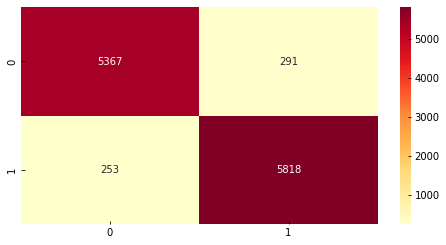

In [63]:
import matplotlib.pyplot as plt
print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap( cm4 , annot = True,fmt='d',cmap="YlOrRd")

### Graph of Bagging

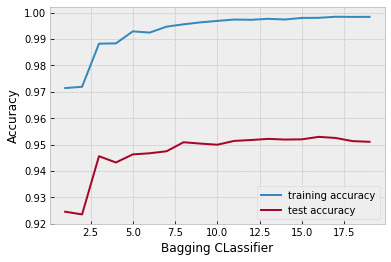

In [64]:
#bc
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    bagging =  BaggingClassifier(n_estimators=n)

    bagging.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(bagging.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(bagging.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Bagging CLassifier")
plt.legend();

# KNN Classifier

In [70]:
%%time
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1 , algorithm='auto',metric = 'minkowski')

classifier.fit(X_train, y_train)

CPU times: user 35.2 s, sys: 291 ms, total: 35.5 s
Wall time: 34.9 s


KNeighborsClassifier(n_neighbors=1)

In [71]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [72]:
print("Accuracy is ",classifier.score(X_test, y_test))

Accuracy is  0.9315372154488873


### Performance Evaluation Metrix of KNN

In [73]:
cm8 = confusion_matrix(y_test, y_pred)
print(cm8)
print(classification_report(y_test, y_pred))

[[5245  413]
 [ 390 5681]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5658
           1       0.93      0.94      0.93      6071

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



### Confusion Metrix


CONFUSION MATRIX


<AxesSubplot:>

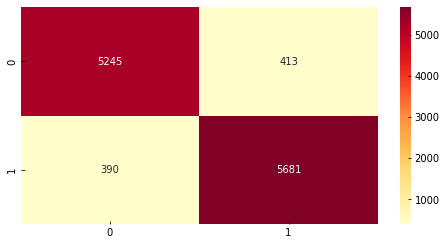

In [74]:
import matplotlib.pyplot as plt
print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap( cm8 , annot = True,fmt='d',cmap="YlOrRd")

# Decision Tree

In [75]:
%%time
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
DT.fit(X_train, y_train)

CPU times: user 1.78 s, sys: 0 ns, total: 1.78 s
Wall time: 1.78 s


DecisionTreeClassifier(criterion='entropy', random_state=30)

In [76]:
y_pred = DT.predict(X_test)

In [77]:
print("Accuracy is ",DT.score(X_test, y_test))

Accuracy is  0.9322192855315884


### Performance evaluation Metrix of Decision Tree

In [78]:
cm9 = confusion_matrix(y_test, y_pred)
print(cm9)
print(classification_report(y_test, y_pred))

[[5240  418]
 [ 377 5694]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5658
           1       0.93      0.94      0.93      6071

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



### Confusion Metrix


CONFUSION MATRIX


<AxesSubplot:>

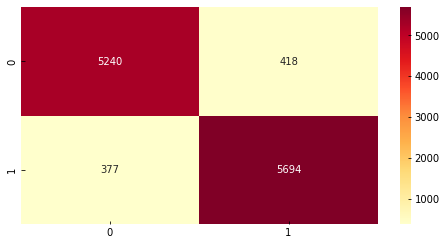

In [79]:
import matplotlib.pyplot as plt
print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap( cm9 , annot = True,fmt='d',cmap="YlOrRd")

# XGBOOST

In [80]:
%%time
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


CPU times: user 3min 16s, sys: 2.79 s, total: 3min 19s
Wall time: 1min 5s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [81]:
pred = xgb.predict(X_test)

In [82]:
print("Accuracy is ",xgb.score(X_test, y_test))

Accuracy is  0.9556654446244351


### Performance Evaluation Metrix of XGBoost

In [83]:
cm13 = confusion_matrix(y_test, pred)
print(cm13)
print(classification_report(y_test, pred))

[[5377  281]
 [ 239 5832]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5658
           1       0.95      0.96      0.96      6071

    accuracy                           0.96     11729
   macro avg       0.96      0.96      0.96     11729
weighted avg       0.96      0.96      0.96     11729



### Confusion Metrix


CONFUSION MATRIX


<AxesSubplot:>

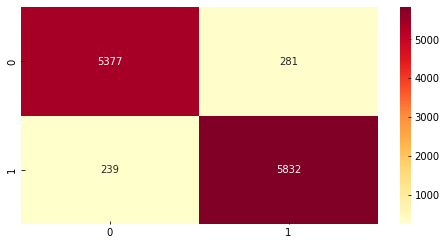

In [84]:
import matplotlib.pyplot as plt
print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap( cm13 , annot = True,fmt='d',cmap="YlOrRd")

## Naives Bayes

In [100]:
%%timeit
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(X_train,y_train)

145 ms ± 7.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [101]:
y_pred=clf.predict(X_test)

In [102]:
print("Accuracy is ",clf.score(X_test, y_test))

Accuracy is  0.9012703555290306


### Performance Evaluation Metrix of Naiyes Bayes 


In [103]:
cm6 = confusion_matrix(y_test, y_pred)
print(cm6)
print(classification_report(y_test, y_pred))

[[4991  667]
 [ 491 5580]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      5658
           1       0.89      0.92      0.91      6071

    accuracy                           0.90     11729
   macro avg       0.90      0.90      0.90     11729
weighted avg       0.90      0.90      0.90     11729



### Confusion Metrix


CONFUSION MATRIX


<AxesSubplot:>

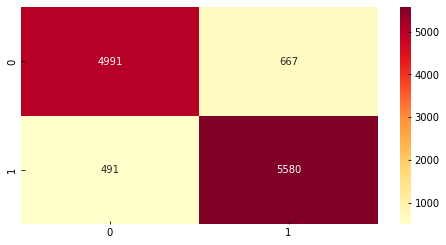

In [104]:
import matplotlib.pyplot as plt
print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,4))
sns.heatmap( cm6 , annot = True,fmt='d',cmap="YlOrRd")